# Importing the Required libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
from tensorflow.keras.utils import *
from tensorflow.keras.regularizers import * 

Lets create a custom dataset with own labels

In [4]:
text_data = ["Sun rises from the east", "Men and monkeys are cousins", 
             "All that glitters is not gold","Tujh me Rab dekta ho", 
             "All souls are equal", "Smile begets from virtue", "Death prevails",
             "Mankind is boundless", "Do this today, eat that tomorrow", "We are nothing", 
             "Truth is relative", "Light is the twin of darkness", "Everything lasts forever", "The sun set in the west"]

text_label = ["Absolutely", "Who knows","Absolutely","Who knows", "Who knows","Absolutely",
             "Absolutely","Absolutely","Who knows", "Not likely","Not likely","Who knows",
              "Not likely", "Absolutely"]


# Corverting the list to nympy array

text_data = np.array(text_data)
text_label = np.array(text_label)

In [5]:
for i in range(5):
    print(f"Data.....: {text_data[i]}")
    print(f"Label....: {text_label[i]}")

Data.....: Sun rises from the east
Label....: Absolutely
Data.....: Men and monkeys are cousins
Label....: Who knows
Data.....: All that glitters is not gold
Label....: Absolutely
Data.....: Tujh me Rab dekta ho
Label....: Who knows
Data.....: All souls are equal
Label....: Who knows


# Now creating a pipeline with tensorflow

In [6]:
text_pipeline = tf.data.Dataset.from_tensor_slices((text_data, text_label)).batch(3).shuffle(100)

In [7]:
a1,a2 = next(iter(text_pipeline))

In [8]:
print(a1.numpy(), a2.numpy())

[b'Death prevails' b'Mankind is boundless'
 b'Do this today, eat that tomorrow'] [b'Absolutely' b'Absolutely' b'Who knows']


In [9]:
for i in range(3):
    a1,a2 = next(iter(text_pipeline))
    print(a2.numpy())

[b'Absolutely' b'Absolutely' b'Who knows']
[b'Not likely' b'Absolutely']
[b'Absolutely' b'Who knows' b'Absolutely']


# Lets work with image data from Keras 

Loaiding the data from kreas

In [10]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[5]


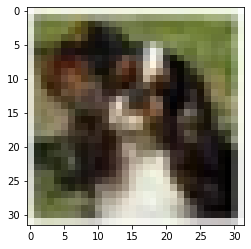

In [11]:
data = 500
plt.imshow(X_train[data])
print(Y_train[data])

In [12]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


# Now lets create a pipeline for image data

In [13]:
Img_pipeline = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(3).shuffle(50000)

In [14]:
X_train_1 = X_train / 255
Y_train_1 = to_categorical(Y_train, len(np.unique(Y_train)))

In [15]:
print(Y_train_1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [16]:
Img_pipeline_2 = tf.data.Dataset.from_tensor_slices((X_train_1, Y_train_1)).batch(512).shuffle(50000)

In [17]:
b1, b2 = next(iter(Img_pipeline_2))

In [18]:
for i in range(5):
    b1, b2 = next(iter(Img_pipeline_2))
    print(b2.numpy())

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
